In [1]:
import ast
import pandas as pd
import torch

from data_processing import save_probabilities
from visualization import view_plateau

In [2]:
# checkpoint = torch.load('../saved_models/orthography_3gen.pth')
# train_char_probs = checkpoint['train_char_prediction_probs']
# valid_char_probs = checkpoint['valid_char_prediction_probs']

# save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='w', set='validation')
# save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='a', set='train')

# or3_results = pd.read_csv('../results/orthography_3gen.csv')
# or3_results

In [3]:
# or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
# or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

# filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

# filtered_df

## Suffix vs Non-suffix Words

In [4]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [5]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])][['lemma', 'phon', 'gen']]
echantinom

,lemma,phon,gen
0,berlingue,bɛʁ.lɛ̃g,m
1,corton,kɔʁ.tɔ̃,m
2,dabuche,da.byʃ,f
3,faf,faf,m
4,gail,gaj,f
...,...,...,...
4995,palu,pa.ly,m
4996,talc,talk,m
4997,sauvetage,sO.və.taʒ,m
4998,plaid,plɛd,m


### Orthographic forms

In [6]:
orth_preds = pd.read_csv('../results/echantinom_orth_preds.csv')
orth_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,bi,bi,m,m,"[('i', {'f': 0.10226600617170334, 'm': 0.89773...",test
1,as,as,m,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test
2,an,ɑ̃,m,m,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test
3,té,te,m,m,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test
...,...,...,...,...,...,...
4529,sous-alimentation,suzalimɑ̃tasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test
4530,approvisionnement,apʁOvizjɔnəmɑ̃,m,m,"[('t', {'f': 0.33767399191856384, 'm': 0.66232...",test
4531,cul-de-basse-fosse,kydəbasəfos,m,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4532,transsubstantiation,tʁɑ̃ssypstɑ̃tjasjɔ̃,f,f,"[('n', {'f': 0.6975879669189453, 'm': 0.302412...",test


In [7]:
orth_correct = orth_preds[orth_preds['Predicted Gender'] == orth_preds['True Gender']]

orth_percentage_correct = (orth_correct.shape[0] / orth_preds.shape[0]) * 100
orth_percentage_correct


90.69254521393913

In [8]:
incorrect = orth_preds[orth_preds['Predicted Gender'] != orth_preds['True Gender']]
incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
4,mob,mɔb,m,f,"[('b', {'f': 0.24886830151081085, 'm': 0.75113...",test
6,mer,mɛʁ,m,f,"[('r', {'f': 0.3038800358772278, 'm': 0.696119...",test
10,glu,gly,m,f,"[('u', {'f': 0.5225964784622192, 'm': 0.477403...",test
16,clé,kle,m,f,"[('é', {'f': 0.21048486232757568, 'm': 0.78951...",test
30,ire,iʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
...,...,...,...,...,...,...
4493,lance-missiles,lɑ̃smisil,f,m,"[('s', {'f': 0.2900664508342743, 'm': 0.709933...",test
4496,côtes-du-rhône,kotdyʁon,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4513,perpendiculaire,pɛʁpɑ̃dikylɛʁ,m,f,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test
4522,homme-grenouille,ɔmgʁənuj,f,m,"[('e', {'f': 0.21346718072891235, 'm': 0.78653...",test


In [9]:
# [word for word in echantinom_preds['Word'].tolist() if word.endswith('age')]

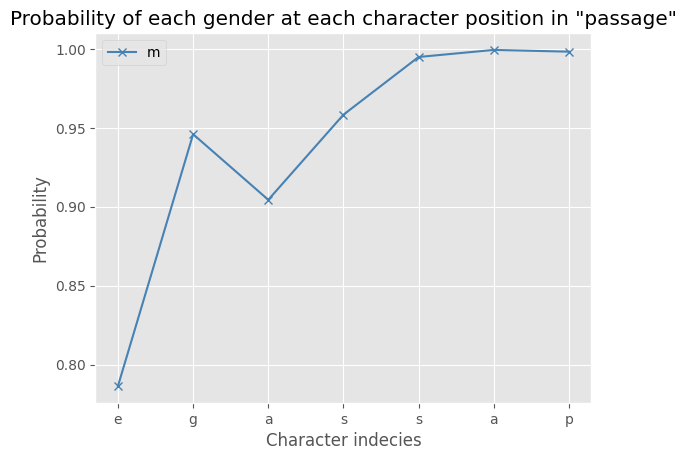

Probability values:
  [('e', {'f': 0.21346718072891235, 'm': 0.7865327596664429}), ('g', {'f': 0.054052479565143585, 'm': 0.945947527885437}), ('a', {'f': 0.09559880942106247, 'm': 0.9044012427330017}), ('s', {'f': 0.04168989136815071, 'm': 0.9583101272583008}), ('s', {'f': 0.005142552312463522, 'm': 0.9948574304580688}), ('a', {'f': 0.0006688202847726643, 'm': 0.9993312358856201}), ('p', {'f': 0.001772546675056219, 'm': 0.9982274174690247})]
----------------------------------------------------------------------------------------------------



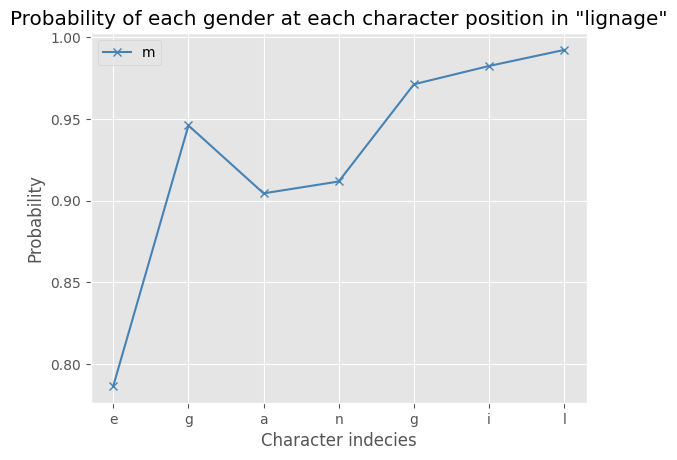

Probability values:
  [('e', {'f': 0.21346718072891235, 'm': 0.7865327596664429}), ('g', {'f': 0.054052479565143585, 'm': 0.945947527885437}), ('a', {'f': 0.09559880942106247, 'm': 0.9044012427330017}), ('n', {'f': 0.08834044635295868, 'm': 0.9116595387458801}), ('g', {'f': 0.028850862756371498, 'm': 0.971149206161499}), ('i', {'f': 0.017633629962801933, 'm': 0.9823663234710693}), ('l', {'f': 0.007813774049282074, 'm': 0.9921861886978149})]
----------------------------------------------------------------------------------------------------



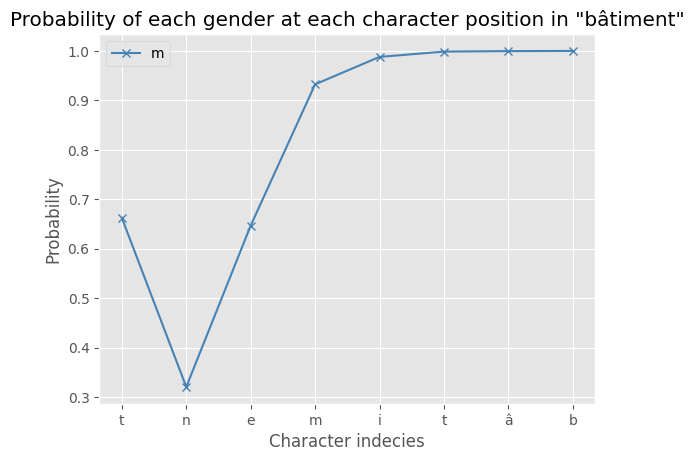

Probability values:
  [('t', {'f': 0.33767399191856384, 'm': 0.6623260378837585}), ('n', {'f': 0.6793915629386902, 'm': 0.3206084370613098}), ('e', {'f': 0.3532100021839142, 'm': 0.6467900276184082}), ('m', {'f': 0.06764331459999084, 'm': 0.9323567152023315}), ('i', {'f': 0.012219362892210484, 'm': 0.9877806901931763}), ('t', {'f': 0.0015147057129070163, 'm': 0.998485267162323}), ('â', {'f': 0.0004991642781533301, 'm': 0.9995008707046509}), ('b', {'f': 0.00012469211651477963, 'm': 0.9998753070831299})]
----------------------------------------------------------------------------------------------------



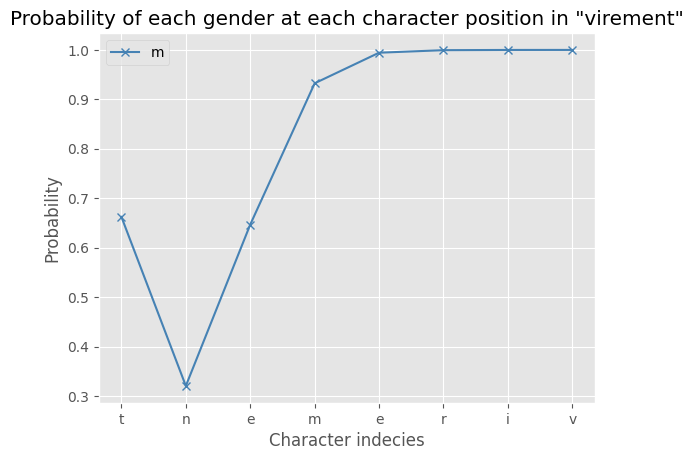

Probability values:
  [('t', {'f': 0.33767399191856384, 'm': 0.6623260378837585}), ('n', {'f': 0.6793915629386902, 'm': 0.3206084370613098}), ('e', {'f': 0.3532100021839142, 'm': 0.6467900276184082}), ('m', {'f': 0.06764331459999084, 'm': 0.9323567152023315}), ('e', {'f': 0.005822926294058561, 'm': 0.9941771030426025}), ('r', {'f': 0.0006927855429239571, 'm': 0.9993071556091309}), ('i', {'f': 0.0002534478553570807, 'm': 0.9997465014457703}), ('v', {'f': 0.0001933595194714144, 'm': 0.9998067021369934})]
----------------------------------------------------------------------------------------------------



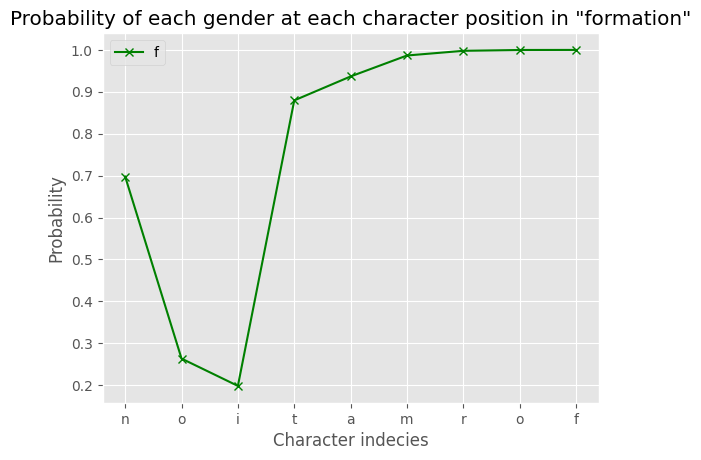

Probability values:
  [('n', {'f': 0.6975879669189453, 'm': 0.3024120628833771}), ('o', {'f': 0.26339665055274963, 'm': 0.736603319644928}), ('i', {'f': 0.19816136360168457, 'm': 0.8018386363983154}), ('t', {'f': 0.8794413805007935, 'm': 0.12055863440036774}), ('a', {'f': 0.9366241097450256, 'm': 0.06337589770555496}), ('m', {'f': 0.9865836501121521, 'm': 0.013416383415460587}), ('r', {'f': 0.9977450966835022, 'm': 0.002254890976473689}), ('o', {'f': 0.9997468590736389, 'm': 0.00025308033218607306}), ('f', {'f': 0.9998866319656372, 'm': 0.00011336120951455086})]
----------------------------------------------------------------------------------------------------



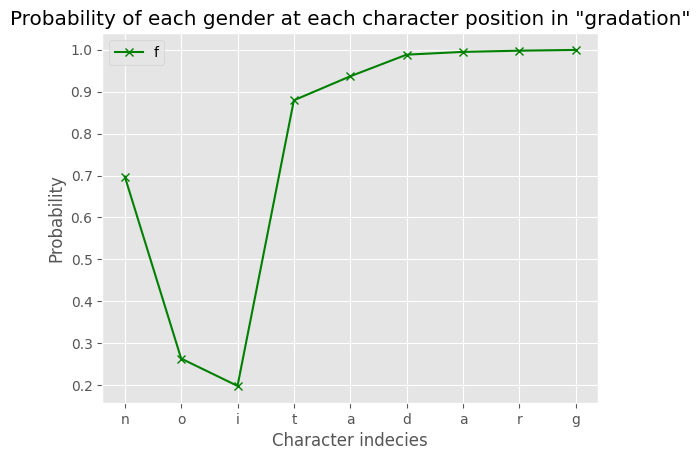

Probability values:
  [('n', {'f': 0.6975879669189453, 'm': 0.3024120628833771}), ('o', {'f': 0.26339665055274963, 'm': 0.736603319644928}), ('i', {'f': 0.19816136360168457, 'm': 0.8018386363983154}), ('t', {'f': 0.8794413805007935, 'm': 0.12055863440036774}), ('a', {'f': 0.9366241097450256, 'm': 0.06337589770555496}), ('d', {'f': 0.9882627129554749, 'm': 0.011737252585589886}), ('a', {'f': 0.994850218296051, 'm': 0.0051497831009328365}), ('r', {'f': 0.9977273344993591, 'm': 0.002272622426971793}), ('g', {'f': 0.999555766582489, 'm': 0.0004442641220521182})]


In [10]:
view_plateau('passage', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('lignage', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('bâtiment', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('virement', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('formation', orth_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('gradation', orth_preds, binary=True)

In [11]:
orth_preds_x10 = pd.read_csv('../results/echantinom_orth_preds_x10.csv')
orth_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
0,an,m,m,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1
1,bi,m,m,"[('i', {'f': 0.16074861586093903, 'm': 0.83925...",test,1
2,as,m,m,"[('s', {'f': 0.2868475317955017, 'm': 0.713152...",test,1
3,té,m,m,"[('é', {'f': 0.3696044683456421, 'm': 0.630395...",test,1
4,pie,f,f,"[('e', {'f': 0.11107771843671799, 'm': 0.88892...",test,1
...,...,...,...,...,...,...
45315,approvisionnement,m,m,"[('t', {'f': 0.07809196412563324, 'm': 0.92190...",test,10
45316,sous-alimentation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10
45317,cul-de-basse-fosse,m,m,"[('e', {'f': 0.23680555820465088, 'm': 0.76319...",test,10
45318,marie-couche-toi-là,f,f,"[('à', {'f': 0.28149473667144775, 'm': 0.71850...",test,10


In [12]:
orth_preds_x10[orth_preds_x10['Form'] == 'gradation']

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
3275,gradation,f,f,"[('n', {'f': 0.4085073173046112, 'm': 0.591492...",test,1
7720,gradation,f,f,"[('n', {'f': 0.30895906686782837, 'm': 0.69104...",test,2
12087,gradation,f,f,"[('n', {'f': 0.7717419266700745, 'm': 0.228258...",test,3
16996,gradation,f,f,"[('n', {'f': 0.4002501368522644, 'm': 0.599749...",test,4
21396,gradation,f,f,"[('n', {'f': 0.3324614465236664, 'm': 0.667538...",test,5
26114,gradation,f,f,"[('n', {'f': 0.5791807174682617, 'm': 0.420819...",test,6
30346,gradation,f,f,"[('n', {'f': 0.3617360591888428, 'm': 0.638263...",test,7
34831,gradation,f,f,"[('n', {'f': 0.4872220754623413, 'm': 0.512777...",test,8
39509,gradation,f,f,"[('n', {'f': 0.6699172258377075, 'm': 0.330082...",test,9
43801,gradation,f,f,"[('n', {'f': 0.38623788952827454, 'm': 0.61376...",test,10


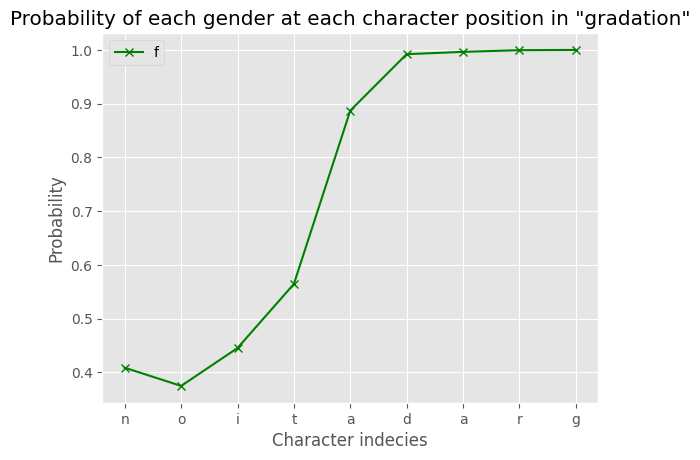

Probability values:
  [('n', {'f': 0.4085073173046112, 'm': 0.5914926528930664}), ('o', {'f': 0.37467360496520996, 'm': 0.62532639503479}), ('i', {'f': 0.445185124874115, 'm': 0.554814875125885}), ('t', {'f': 0.5643824338912964, 'm': 0.435617595911026}), ('a', {'f': 0.8869782090187073, 'm': 0.11302178353071213}), ('d', {'f': 0.9920037388801575, 'm': 0.007996274158358574}), ('a', {'f': 0.9962970614433289, 'm': 0.0037029176019132137}), ('r', {'f': 0.9994258880615234, 'm': 0.0005741975619457662}), ('g', {'f': 0.9999027252197266, 'm': 9.72617490333505e-05})]


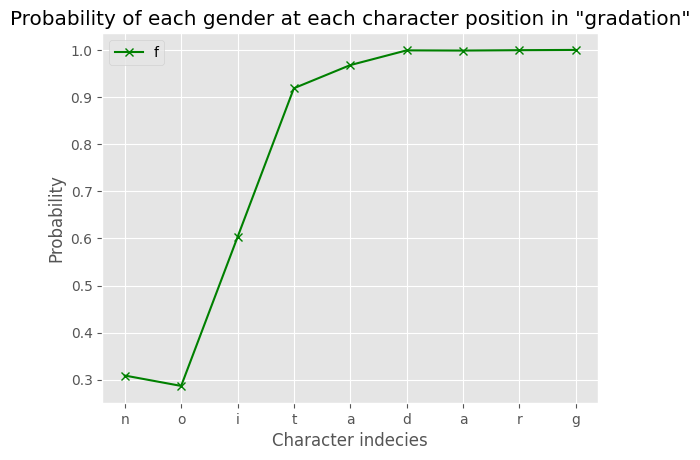

Probability values:
  [('n', {'f': 0.30895906686782837, 'm': 0.6910409331321716}), ('o', {'f': 0.2869282364845276, 'm': 0.7130718231201172}), ('i', {'f': 0.6026254892349243, 'm': 0.3973744809627533}), ('t', {'f': 0.9185997843742371, 'm': 0.08140026777982712}), ('a', {'f': 0.967702329158783, 'm': 0.032297637313604355}), ('d', {'f': 0.9989703893661499, 'm': 0.001029597013257444}), ('a', {'f': 0.9985577464103699, 'm': 0.0014422849053516984}), ('r', {'f': 0.9993637204170227, 'm': 0.0006363368011079729}), ('g', {'f': 0.9999182224273682, 'm': 8.173181413440034e-05})]


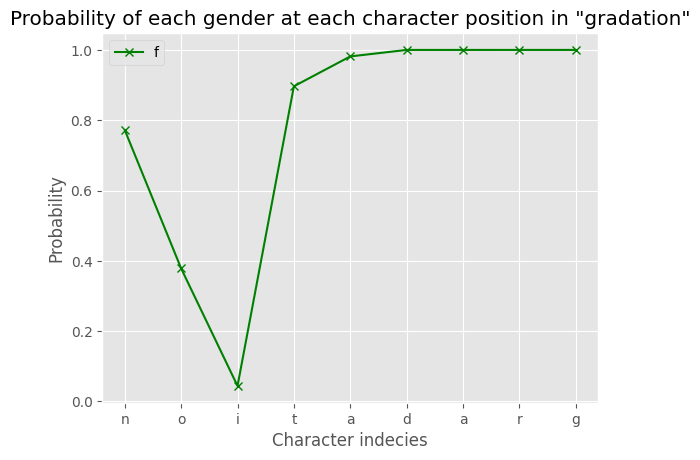

Probability values:
  [('n', {'f': 0.7717419266700745, 'm': 0.22825810313224792}), ('o', {'f': 0.37817126512527466, 'm': 0.6218287348747253}), ('i', {'f': 0.04399128630757332, 'm': 0.9560086727142334}), ('t', {'f': 0.8965083360671997, 'm': 0.1034916564822197}), ('a', {'f': 0.9814957976341248, 'm': 0.018504220992326736}), ('d', {'f': 0.9999613761901855, 'm': 3.860219658236019e-05}), ('a', {'f': 0.9999710321426392, 'm': 2.9002871087868698e-05}), ('r', {'f': 0.9999899864196777, 'm': 9.956072972272523e-06}), ('g', {'f': 0.9999926090240479, 'm': 7.339382591453614e-06})]


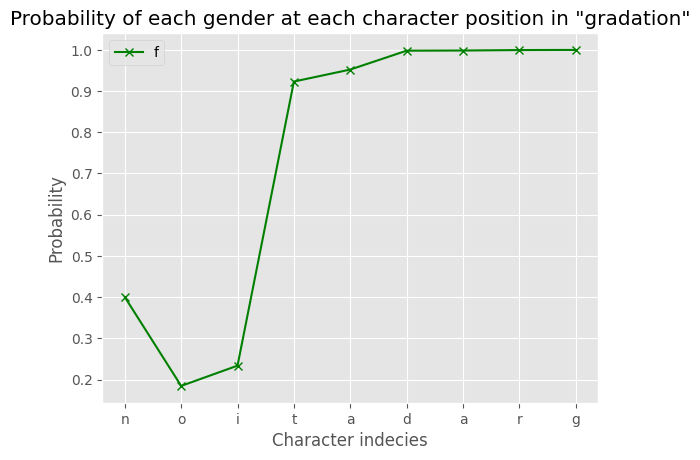

Probability values:
  [('n', {'f': 0.4002501368522644, 'm': 0.5997498631477356}), ('o', {'f': 0.1847696304321289, 'm': 0.8152303695678711}), ('i', {'f': 0.23394618928432465, 'm': 0.7660537958145142}), ('t', {'f': 0.9230120778083801, 'm': 0.07698789983987808}), ('a', {'f': 0.9521126747131348, 'm': 0.04788734391331673}), ('d', {'f': 0.9978588223457336, 'm': 0.0021412228234112263}), ('a', {'f': 0.9982563853263855, 'm': 0.0017435677582398057}), ('r', {'f': 0.999401330947876, 'm': 0.0005987116601318121}), ('g', {'f': 0.9997299313545227, 'm': 0.000270060176262632})]


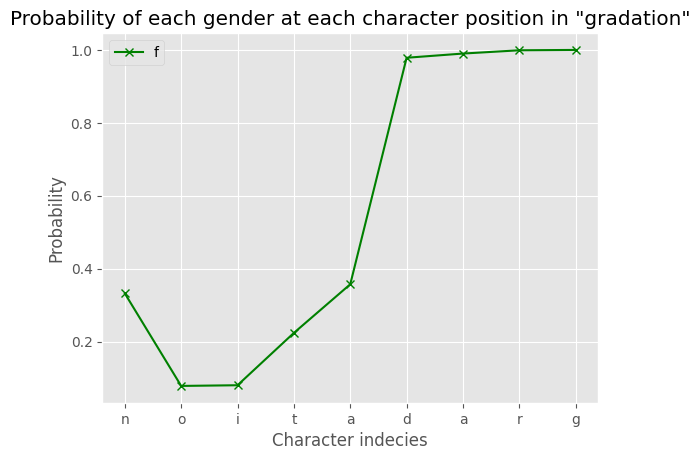

Probability values:
  [('n', {'f': 0.3324614465236664, 'm': 0.6675386428833008}), ('o', {'f': 0.07872739434242249, 'm': 0.9212725758552551}), ('i', {'f': 0.08060324192047119, 'm': 0.9193967580795288}), ('t', {'f': 0.22409452497959137, 'm': 0.7759054899215698}), ('a', {'f': 0.35740193724632263, 'm': 0.642598032951355}), ('d', {'f': 0.9783539175987244, 'm': 0.021646127104759216}), ('a', {'f': 0.9898785352706909, 'm': 0.010121464729309082}), ('r', {'f': 0.998853325843811, 'm': 0.0011467225849628448}), ('g', {'f': 0.9998401403427124, 'm': 0.00015985994832590222})]


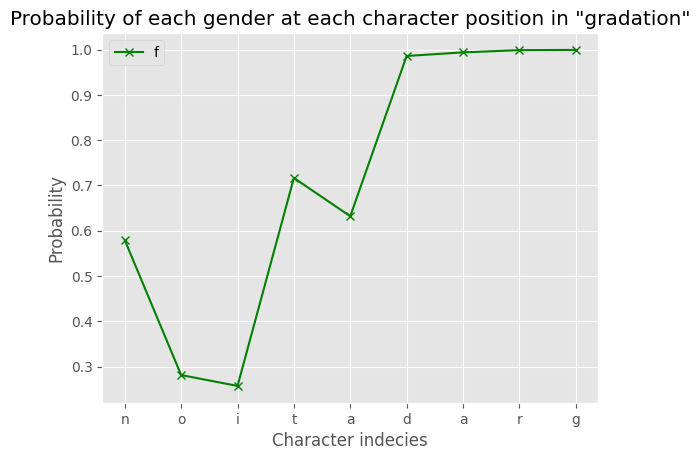

Probability values:
  [('n', {'f': 0.5791807174682617, 'm': 0.42081931233406067}), ('o', {'f': 0.28114011883735657, 'm': 0.7188599109649658}), ('i', {'f': 0.25711485743522644, 'm': 0.742885172367096}), ('t', {'f': 0.7166929244995117, 'm': 0.28330716490745544}), ('a', {'f': 0.632027804851532, 'm': 0.367972195148468}), ('d', {'f': 0.9861620664596558, 'm': 0.013838007114827633}), ('a', {'f': 0.9941042065620422, 'm': 0.005895772948861122}), ('r', {'f': 0.999061644077301, 'm': 0.0009383627912029624}), ('g', {'f': 0.9995369911193848, 'm': 0.00046298804227262735})]


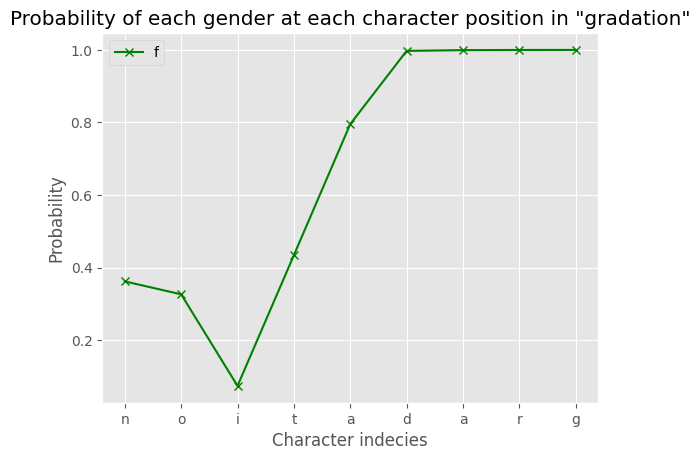

Probability values:
  [('n', {'f': 0.3617360591888428, 'm': 0.6382638812065125}), ('o', {'f': 0.32617130875587463, 'm': 0.6738287210464478}), ('i', {'f': 0.07359118014574051, 'm': 0.9264088273048401}), ('t', {'f': 0.4340672194957733, 'm': 0.5659327507019043}), ('a', {'f': 0.7954404354095459, 'm': 0.2045595645904541}), ('d', {'f': 0.9973115921020508, 'm': 0.0026884162798523903}), ('a', {'f': 0.9993784427642822, 'm': 0.0006215032190084457}), ('r', {'f': 0.9998676776885986, 'm': 0.00013226627197582275}), ('g', {'f': 0.999984860420227, 'm': 1.5144811186473817e-05})]


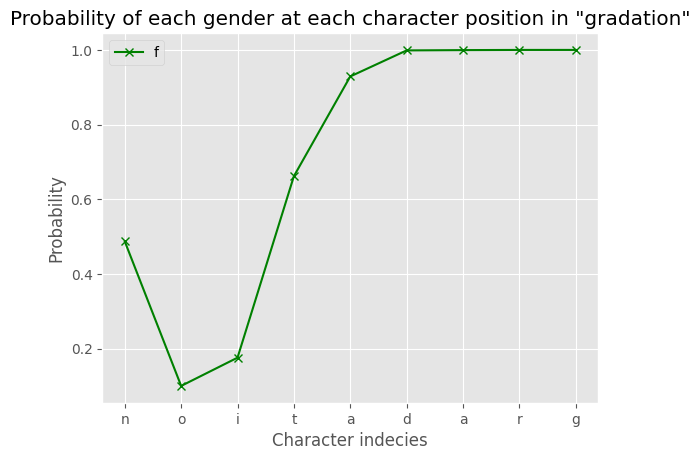

Probability values:
  [('n', {'f': 0.4872220754623413, 'm': 0.5127779245376587}), ('o', {'f': 0.10049106925725937, 'm': 0.8995089530944824}), ('i', {'f': 0.17614559829235077, 'm': 0.823854386806488}), ('t', {'f': 0.6619250178337097, 'm': 0.33807501196861267}), ('a', {'f': 0.9289542436599731, 'm': 0.07104581594467163}), ('d', {'f': 0.9986845850944519, 'm': 0.0013154573971405625}), ('a', {'f': 0.9995032548904419, 'm': 0.0004966926062479615}), ('r', {'f': 0.9999645948410034, 'm': 3.539079625625163e-05}), ('g', {'f': 0.9999926090240479, 'm': 7.3512915150786284e-06})]


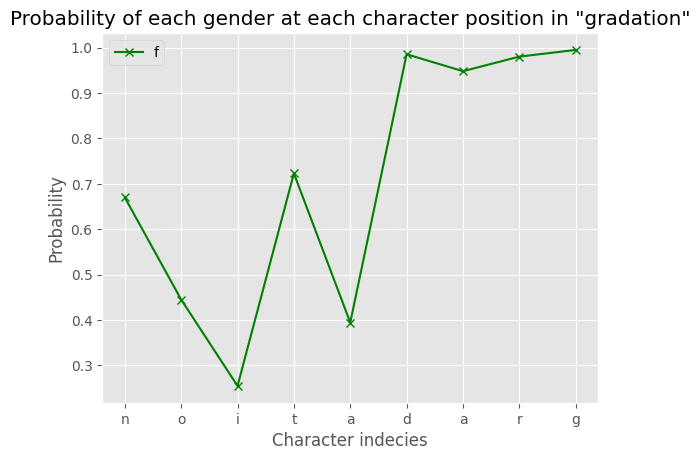

Probability values:
  [('n', {'f': 0.6699172258377075, 'm': 0.3300827145576477}), ('o', {'f': 0.4450015127658844, 'm': 0.5549983978271484}), ('i', {'f': 0.25471463799476624, 'm': 0.7452853918075562}), ('t', {'f': 0.7230298519134521, 'm': 0.2769702076911926}), ('a', {'f': 0.3944169878959656, 'm': 0.6055830717086792}), ('d', {'f': 0.9854803681373596, 'm': 0.014519603922963142}), ('a', {'f': 0.9481880068778992, 'm': 0.051811978220939636}), ('r', {'f': 0.9802610278129578, 'm': 0.019738992676138878}), ('g', {'f': 0.9950364232063293, 'm': 0.004963535349816084})]


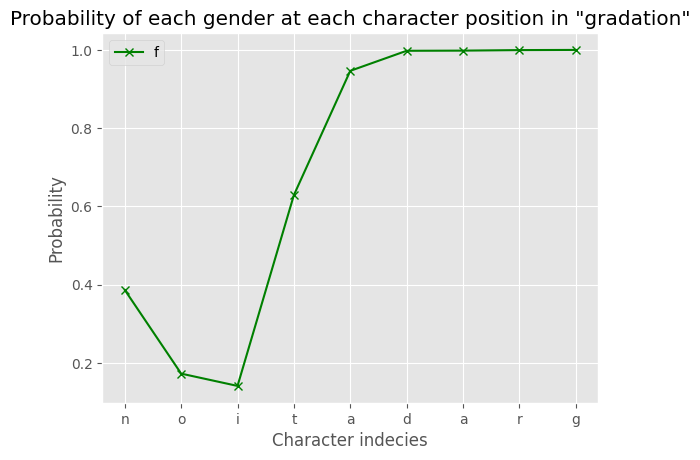

Probability values:
  [('n', {'f': 0.38623788952827454, 'm': 0.6137621402740479}), ('o', {'f': 0.1723945289850235, 'm': 0.8276054263114929}), ('i', {'f': 0.1409531980752945, 'm': 0.8590467572212219}), ('t', {'f': 0.6287655830383301, 'm': 0.3712344169616699}), ('a', {'f': 0.9463849663734436, 'm': 0.053614988923072815}), ('d', {'f': 0.9976413249969482, 'm': 0.002358643803745508}), ('a', {'f': 0.9980701804161072, 'm': 0.001929801655933261}), ('r', {'f': 0.9994387030601501, 'm': 0.0005612657987512648}), ('g', {'f': 0.9998656511306763, 'm': 0.0001342949690297246})]


In [14]:
view_plateau('gradation', orth_preds_x10, binary=True)

### Phonetic forms

In [12]:
phon_preds = pd.read_csv('../results/echantinom_phon_preds.csv')
phon_preds

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set
0,u,houx,m,m,"[('u', {'f': 0.5169596672058105, 'm': 0.483040...",test
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test
4,ɛ,ais,m,m,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test
...,...,...,...,...,...,...
4587,ɛ̃sybɔʁdinasjɔ̃,insubordination,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test
4588,tʁɑ̃splɑ̃tasjɔ̃,transplantation,f,f,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test
4589,kɔ̃fidɑ̃sjalite,confidentialité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test
4590,ɛ̃kɔ̃patibilite,incompatibilité,f,f,"[('e', {'f': 0.48355355858802795, 'm': 0.51644...",test


In [13]:
phon_preds['Noun_Length'] = phon_preds['Form'].apply(len)
phon_preds['Probabilities_Length'] = phon_preds['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = phon_preds[phon_preds['Probabilities_Length'] != phon_preds['Noun_Length']]

filtered_df

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length


In [14]:
phon_correct = phon_preds[phon_preds['Predicted Gender'] == phon_preds['True Gender']]

phon_percentage_correct = (phon_correct.shape[0] / phon_preds.shape[0]) * 100
phon_percentage_correct


77.11236933797909

In [15]:
phon_incorrect = phon_preds[phon_preds['Predicted Gender'] != phon_preds['True Gender']]
phon_incorrect

,Form,Alt Form,Predicted Gender,True Gender,Class Probabilities,Set,Noun_Length,Probabilities_Length
1,ɛ,ais,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,1,1
2,ɛ,haie,m,f,"[('ɛ', {'f': 0.29274383187294006, 'm': 0.70725...",test,1,1
3,o,eau,m,f,"[('o', {'f': 0.6822937726974487, 'm': 0.317706...",test,1,1
7,aj,ail,f,m,"[('j', {'f': 0.24457314610481262, 'm': 0.75542...",test,2,2
8,yp,huppe,m,f,"[('p', {'f': 0.4050317704677582, 'm': 0.594968...",test,2,2
...,...,...,...,...,...,...,...,...
4511,bɛʁnaʁlɛʁmit,bernard-l'ermite,f,m,"[('t', {'f': 0.4614095389842987, 'm': 0.538590...",test,12,12
4536,kɔ̃vɑ̃sjOnɛl,conventionnel,f,m,"[('l', {'f': 0.3344738185405731, 'm': 0.665526...",test,12,12
4544,kɔ̃tʁəpwazɔ̃,contrepoison,f,m,"[('̃', {'f': 0.49001044034957886, 'm': 0.50998...",test,12,12
4557,mOdysOpEʁɑ̃di,modus operandi,f,m,"[('i', {'f': 0.1249736100435257, 'm': 0.875026...",test,13,13


In [16]:
nlexique[nlexique['lexeme'].isin(['passage', 'lignage', 'bâtiment', 'virement', 'formation', 'gradation'])]

,lexeme,phon,gen
2918,bâtiment,batimɑ̃,m
12741,formation,fɔʁmasjɔ̃,f
14020,gradation,gʁadasjɔ̃,f
17177,lignage,liɲaʒ,m
21487,passage,pasaʒ,m
30582,virement,viʁəmɑ̃,m


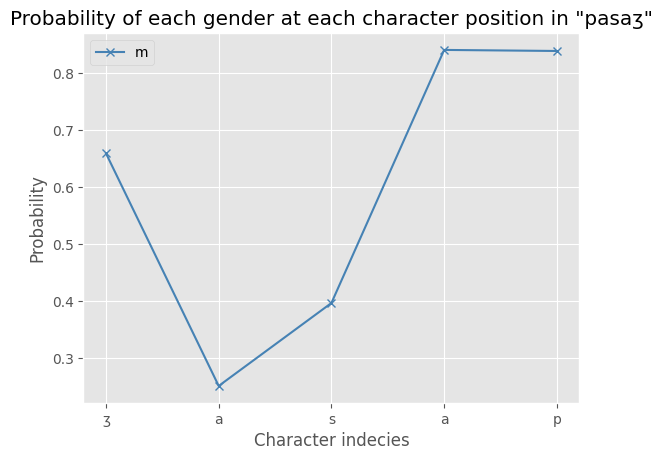

Probability values:
  [('ʒ', {'f': 0.3404069244861603, 'm': 0.6595930457115173}), ('a', {'f': 0.7485259175300598, 'm': 0.2514741122722626}), ('s', {'f': 0.6029843688011169, 'm': 0.39701566100120544}), ('a', {'f': 0.1588825285434723, 'm': 0.8411175012588501}), ('p', {'f': 0.1607329398393631, 'm': 0.8392670750617981})]
----------------------------------------------------------------------------------------------------



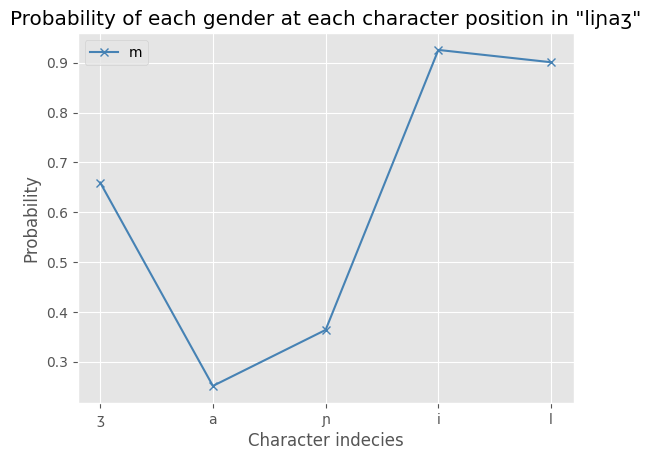

Probability values:
  [('ʒ', {'f': 0.3404069244861603, 'm': 0.6595930457115173}), ('a', {'f': 0.7485259175300598, 'm': 0.2514741122722626}), ('ɲ', {'f': 0.636107325553894, 'm': 0.36389273405075073}), ('i', {'f': 0.07427488267421722, 'm': 0.9257251024246216}), ('l', {'f': 0.09900420159101486, 'm': 0.9009957909584045})]
----------------------------------------------------------------------------------------------------



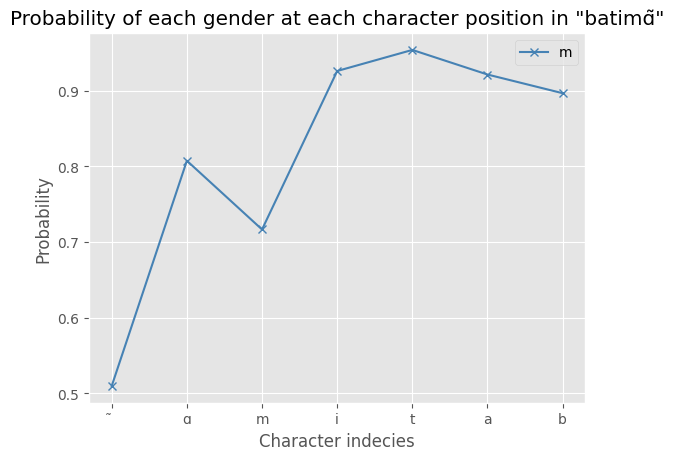

Probability values:
  [('̃', {'f': 0.49001044034957886, 'm': 0.5099895596504211}), ('ɑ', {'f': 0.19261054694652557, 'm': 0.807389497756958}), ('m', {'f': 0.283426433801651, 'm': 0.7165735363960266}), ('i', {'f': 0.07412590086460114, 'm': 0.9258740544319153}), ('t', {'f': 0.0462920181453228, 'm': 0.9537080526351929}), ('a', {'f': 0.07878517359495163, 'm': 0.9212148189544678}), ('b', {'f': 0.10345720499753952, 'm': 0.8965428471565247})]
----------------------------------------------------------------------------------------------------



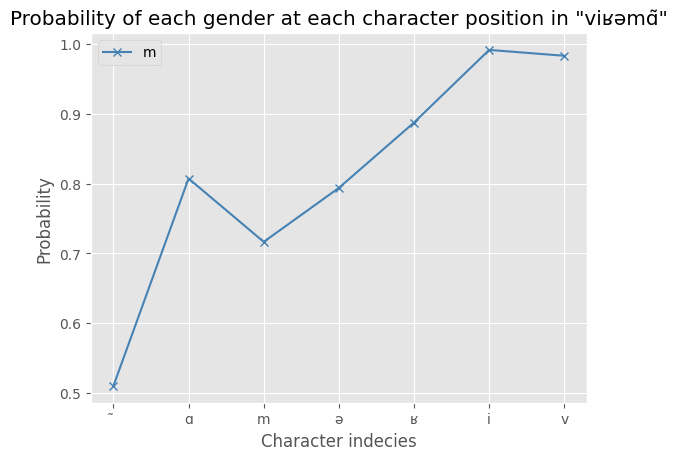

Probability values:
  [('̃', {'f': 0.49001044034957886, 'm': 0.5099895596504211}), ('ɑ', {'f': 0.19261054694652557, 'm': 0.807389497756958}), ('m', {'f': 0.283426433801651, 'm': 0.7165735363960266}), ('ə', {'f': 0.20607328414916992, 'm': 0.7939267158508301}), ('ʁ', {'f': 0.11234710365533829, 'm': 0.8876528739929199}), ('i', {'f': 0.008230849169194698, 'm': 0.9917691946029663}), ('v', {'f': 0.01662137545645237, 'm': 0.9833785891532898})]
----------------------------------------------------------------------------------------------------



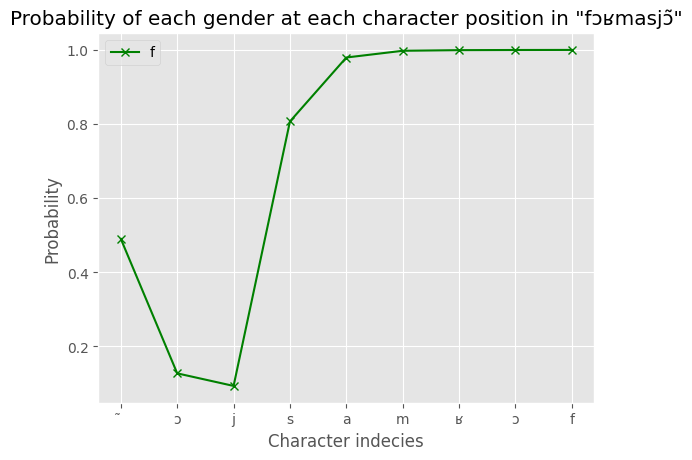

Probability values:
  [('̃', {'f': 0.49001044034957886, 'm': 0.5099895596504211}), ('ɔ', {'f': 0.12739278376102448, 'm': 0.8726072311401367}), ('j', {'f': 0.09350090473890305, 'm': 0.9064990282058716}), ('s', {'f': 0.8069499731063843, 'm': 0.1930500566959381}), ('a', {'f': 0.9794236421585083, 'm': 0.0205763578414917}), ('m', {'f': 0.9975546002388, 'm': 0.0024454472586512566}), ('ʁ', {'f': 0.999292254447937, 'm': 0.0007077779155224562}), ('ɔ', {'f': 0.9996846914291382, 'm': 0.00031527303508482873}), ('f', {'f': 0.9998847246170044, 'm': 0.00011523515422595665})]
----------------------------------------------------------------------------------------------------



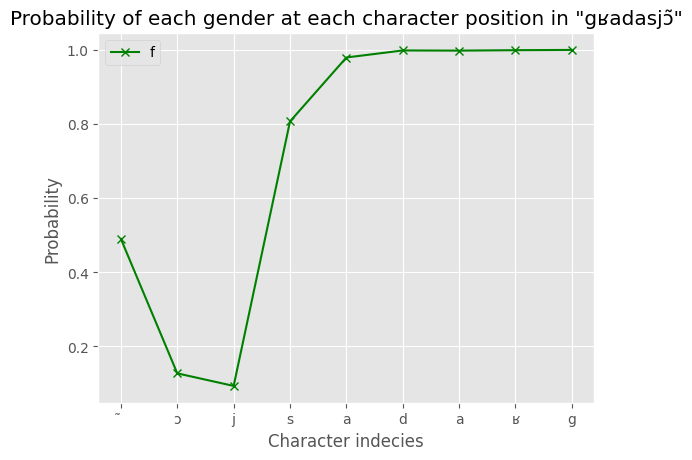

Probability values:
  [('̃', {'f': 0.49001044034957886, 'm': 0.5099895596504211}), ('ɔ', {'f': 0.12739278376102448, 'm': 0.8726072311401367}), ('j', {'f': 0.09350090473890305, 'm': 0.9064990282058716}), ('s', {'f': 0.8069499731063843, 'm': 0.1930500566959381}), ('a', {'f': 0.9794236421585083, 'm': 0.0205763578414917}), ('d', {'f': 0.9984295964241028, 'm': 0.0015703418757766485}), ('a', {'f': 0.9979872703552246, 'm': 0.0020126746967434883}), ('ʁ', {'f': 0.999139666557312, 'm': 0.0008603380993008614}), ('g', {'f': 0.9998722076416016, 'm': 0.00012779489043168724})]


In [17]:
view_plateau('pasaʒ', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('liɲaʒ', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('batimɑ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('viʁəmɑ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('fɔʁmasjɔ̃', phon_preds, binary=True)
print('-' * 100 + '\n')
view_plateau('gʁadasjɔ̃', phon_preds, binary=True)

In [18]:
phon_preds_x10 = pd.read_csv('../results/echantinom_phon_preds_x10.csv')
phon_preds_x10

,Form,Predicted Gender,True Gender,Class Probabilities,Set,Run
0,ɛ,m,f,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
1,u,f,m,"[('u', {'f': 0.3157658278942108, 'm': 0.684234...",test,1
2,ɛ,m,m,"[('ɛ', {'f': 0.14882417023181915, 'm': 0.85117...",test,1
3,o,m,f,"[('o', {'f': 0.5670557618141174, 'm': 0.432944...",test,1
4,ba,m,m,"[('a', {'f': 0.39993923902511597, 'm': 0.60006...",test,1
...,...,...,...,...,...,...
45315,kɔ̃fidɑ̃sjalite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45316,ɛ̃kɔ̃patibilite,f,f,"[('e', {'f': 0.5326544642448425, 'm': 0.467345...",test,10
45317,suzalimɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10
45318,tʁɑ̃splɑ̃tasjɔ̃,f,f,"[('̃', {'f': 0.6368642449378967, 'm': 0.363135...",test,10
